Case study :Covid-19 Data Analysis

In [6]:
# Import the libraries..
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# Import the datasets..
dataset = pd.read_csv('C:\\Users\\choud\\OneDrive\\Downloads\\Tutedude resources\\Tutedude Resourses\\covid19_Confirmed_dataset.csv'
)
dataset.head()


,Province/State,Country/Region,Lat,Long,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,...,4/21/2020,4/22/2020,4/23/2020,4/24/2020,4/25/2020,4/26/2020,4/27/2020,4/28/2020,4/29/2020,4/30/2020
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [3]:
dataset.shape

(266, 104)

In [4]:
# Delete the useless columns..
df = dataset.drop(["Lat", "Long"], axis=1, inplace=True)
dataset.head()

,Province/State,Country/Region,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,...,4/21/2020,4/22/2020,4/23/2020,4/24/2020,4/25/2020,4/26/2020,4/27/2020,4/28/2020,4/29/2020,4/30/2020
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [8]:
# Aggregate the rows by the country..
corona_dataset_aggregated = dataset.groupby("Country/Region").sum()
corona_dataset_aggregated.head()

,Province/State,Lat,Long,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,...,4/21/2020,4/22/2020,4/23/2020,4/24/2020,4/25/2020,4/26/2020,4/27/2020,4/28/2020,4/29/2020,4/30/2020
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,33.0000,65.0000,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,41.1533,20.1683,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,28.0339,1.6596,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,42.5063,1.5218,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,-11.2027,17.8739,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [6]:
corona_dataset_aggregated.shape

(187, 101)

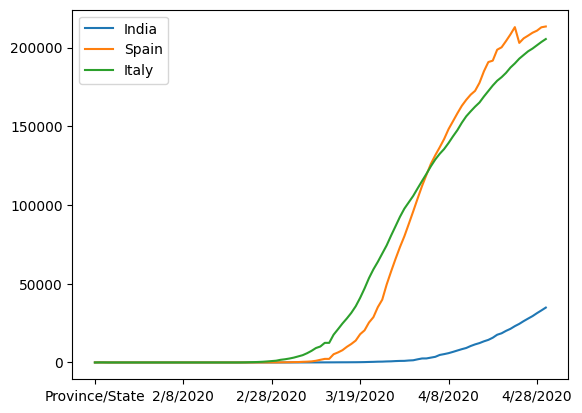

In [9]:
# Visualize the data related to a country 
corona_dataset_aggregated.loc["India"].plot()
corona_dataset_aggregated.loc["Spain"].plot()
corona_dataset_aggregated.loc["Italy"].plot()
plt.legend()

<Axes: >

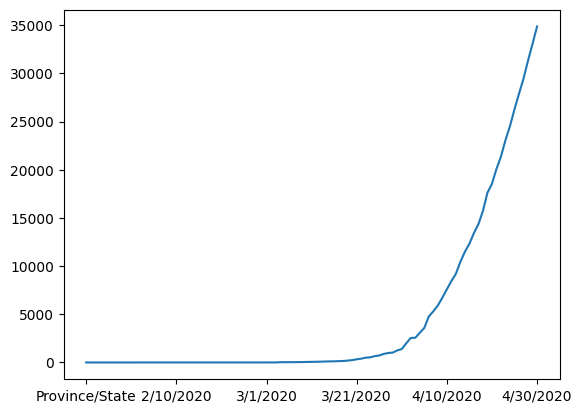

In [15]:
# Calculate a good measure
corona_dataset_aggregated.loc["India"].plot()

<Axes: >

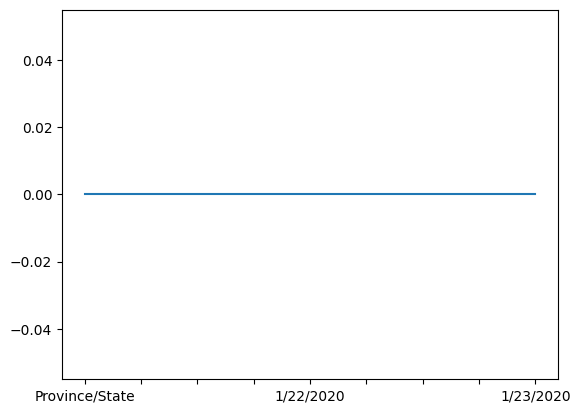

In [21]:
corona_dataset_aggregated.loc["Italy"][:3].plot()

<Axes: >

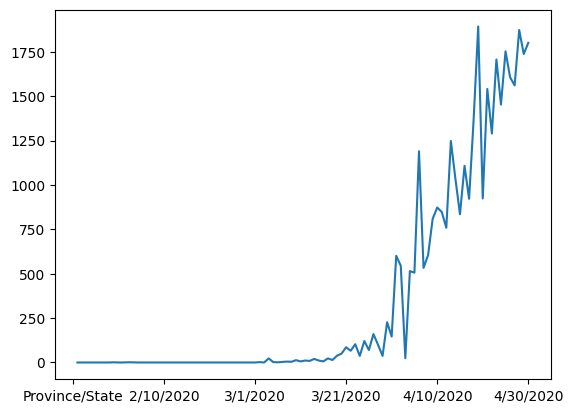

In [22]:
# Calculate the first derivative of the curve
corona_dataset_aggregated.loc['India'].diff().plot()

In [23]:
# Maximum infection rate
corona_dataset_aggregated.loc['India'].diff().max()

np.int64(1893)

In [24]:
corona_dataset_aggregated.loc['Spain'].diff().max()

np.int64(9630)

In [15]:
countries = list(corona_dataset_aggregated.index)
max_infection_rates = []

for c in countries:
    max_infection_rates.append(corona_dataset_aggregated.loc['India'].diff().max())
corona_dataset_aggregated["max_infection_rates"] = max_infection_rates

In [16]:
corona_dataset_aggregated

,Province/State,Lat,Long,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,...,4/22/2020,4/23/2020,4/24/2020,4/25/2020,4/26/2020,4/27/2020,4/28/2020,4/29/2020,4/30/2020,max_infection_rates
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,33.000000,65.000000,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,1893
Albania,0,41.153300,20.168300,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,1893
Algeria,0,28.033900,1.659600,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,1893
Andorra,0,42.506300,1.521800,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,1893
Angola,0,-11.202700,17.873900,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,1893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,31.952200,35.233200,0,0,0,0,0,0,0,...,474,480,484,342,342,342,343,344,344,1893
Western Sahara,0,24.215500,-12.885800,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,1893
Yemen,0,15.552727,48.516388,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,6,6,1893


In [19]:
# Create a new dataframe
corona_data = pd.DataFrame(corona_dataset_aggregated["max_infection_rates"])
corona_data


,max_infection_rates
Country/Region,
Afghanistan,1893
Albania,1893
Algeria,1893
Andorra,1893
Angola,1893
...,...
West Bank and Gaza,1893
Western Sahara,1893
Yemen,1893


In [43]:
# Importing the dataset 2
happiness_data = pd.read_csv('C:\\Users\\choud\\OneDrive\\Downloads\\Tutedude resources\\Tutedude Resourses\\worldwide_happiness_report.csv')
happiness_data

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [44]:
happiness_data.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [40]:
# Drop the useless coloumns
useless_cols = [["Overall rank", "Score", "Generosity", "Perceptions of corruption"]]
useless_cols


[['Overall rank', 'Score', 'Generosity', 'Perceptions of corruption']]

In [53]:
happiness_data.drop(useless_cols, axis=1, inplace=True)
happiness_data.head()

KeyError: "[('Overall rank', 'Score', 'Generosity', 'Perceptions of corruption')] not found in axis"

In [46]:
happiness_data.set_index("Country or region", inplace = True)
happiness_data.head()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,,,
Finland,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393
Denmark,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410
Norway,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341
Iceland,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118
Netherlands,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [47]:
# Join the dataset
corona_data.shape

(187, 1)

In [48]:
happiness_data.shape

(156, 8)

In [49]:
data = corona_data.join(happiness_data, how = "inner")
data

,max_infection_rates,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Afghanistan,1893,154,3.203,0.350,0.517,0.361,0.000,0.158,0.025
Albania,1893,107,4.719,0.947,0.848,0.874,0.383,0.178,0.027
Algeria,1893,88,5.211,1.002,1.160,0.785,0.086,0.073,0.114
Argentina,1893,47,6.086,1.092,1.432,0.881,0.471,0.066,0.050
Armenia,1893,116,4.559,0.850,1.055,0.815,0.283,0.095,0.064
...,...,...,...,...,...,...,...,...,...
Venezuela,1893,108,4.707,0.960,1.427,0.805,0.154,0.064,0.047
Vietnam,1893,94,5.175,0.741,1.346,0.851,0.543,0.147,0.073
Yemen,1893,151,3.380,0.287,1.163,0.463,0.143,0.108,0.077
Zambia,1893,138,4.107,0.578,1.058,0.426,0.431,0.247,0.087


In [54]:
data.corr()

,max_infection_rates,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
max_infection_rates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Overall rank,NaN,1.000000,-0.988972,-0.802204,-0.780955,-0.804753,-0.570490,-0.063107,-0.389360
Score,NaN,-0.988972,1.000000,0.793847,0.788591,0.799893,0.587007,0.090420,0.420437
GDP per capita,NaN,-0.802204,0.793847,1.000000,0.759468,0.863062,0.394603,-0.103870,0.311577
Social support,NaN,-0.780955,0.788591,0.759468,1.000000,0.765286,0.456246,-0.061361,0.203225
Healthy life expectancy,NaN,-0.804753,0.799893,0.863062,0.765286,1.000000,0.427892,-0.068387,0.314811
Freedom to make life choices,NaN,-0.570490,0.587007,0.394603,0.456246,0.427892,1.000000,0.258539,0.446677
Generosity,NaN,-0.063107,0.090420,-0.103870,-0.061361,-0.068387,0.258539,1.000000,0.326166
Perceptions of corruption,NaN,-0.389360,0.420437,0.311577,0.203225,0.314811,0.446677,0.326166,1.000000


In [55]:
data

,max_infection_rates,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Afghanistan,1893,154,3.203,0.350,0.517,0.361,0.000,0.158,0.025
Albania,1893,107,4.719,0.947,0.848,0.874,0.383,0.178,0.027
Algeria,1893,88,5.211,1.002,1.160,0.785,0.086,0.073,0.114
Argentina,1893,47,6.086,1.092,1.432,0.881,0.471,0.066,0.050
Armenia,1893,116,4.559,0.850,1.055,0.815,0.283,0.095,0.064
...,...,...,...,...,...,...,...,...,...
Venezuela,1893,108,4.707,0.960,1.427,0.805,0.154,0.064,0.047
Vietnam,1893,94,5.175,0.741,1.346,0.851,0.543,0.147,0.073
Yemen,1893,151,3.380,0.287,1.163,0.463,0.143,0.108,0.077
Zambia,1893,138,4.107,0.578,1.058,0.426,0.431,0.247,0.087


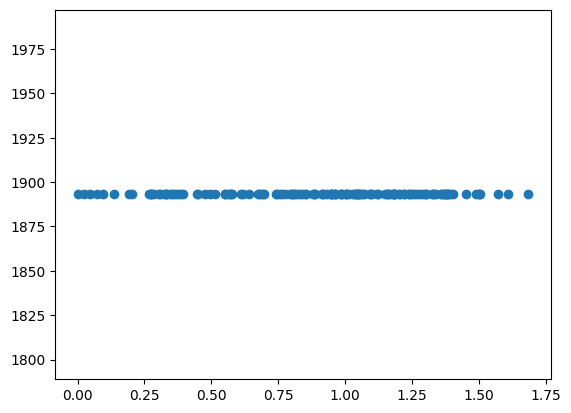

In [69]:
# Visualization
x = data["GDP per capita"]
y = data["max_infection_rates"]
# sns.scatterplot(x)
# sns.scatterplot(y)
plt.scatter(x, y)
# Visualization
# x = data["GDP per capita"]
# y = data["max_infection_rates"]
# sns.scatterplot(data=data, x="GDP per capita", y="max_infection_rates")
# plt.show()  # Add this to display the plot

['max_infection_rates', 'Overall rank', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']


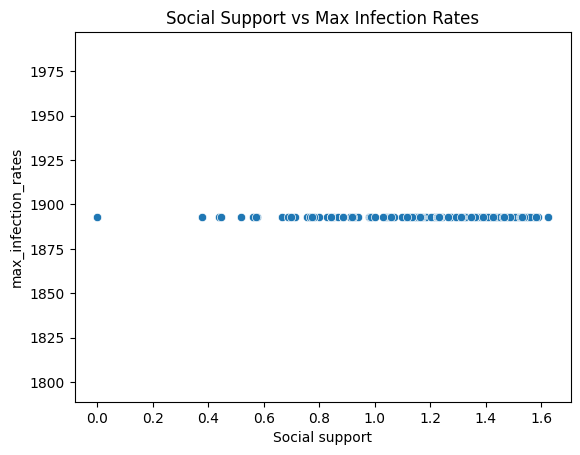

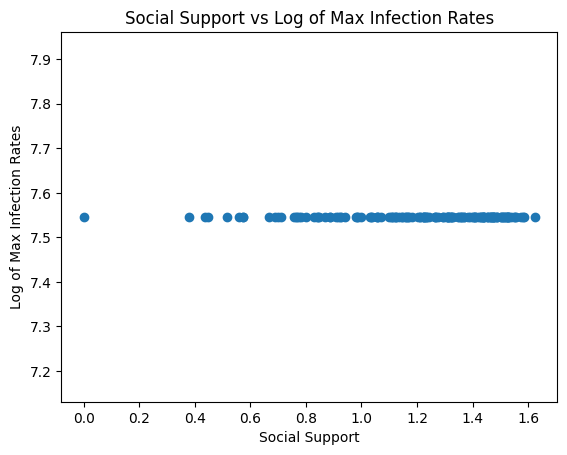

In [77]:
# x =data["Social support"]
# y = data["max_infection_rates"]
# plt.scatterplot(x,np.log(y))
# First, let's see the exact column names
print(data.columns.tolist())

# Then use the correct plotting syntax with the exact column name
x = data["Social support"]  # Note the capital 'S'
y = data["max_infection_rates"]

# Using seaborn (recommended for statistical visualizations)
sns.scatterplot(data=data, x="Social support", y="max_infection_rates")
plt.title("Social Support vs Max Infection Rates")
plt.show()

# OR using matplotlib
plt.scatter(x, np.log(y))
plt.xlabel("Social Support")
plt.ylabel("Log of Max Infection Rates")
plt.title("Social Support vs Log of Max Infection Rates")
plt.show()


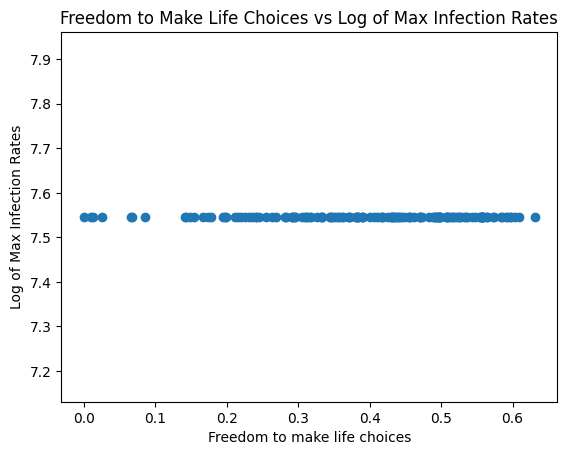

In [78]:
x = data["Freedom to make life choices"]
y = data["max_infection_rates"]
plt.scatter(x, np.log(y))
plt.xlabel("Freedom to make life choices")
plt.ylabel("Log of Max Infection Rates")
plt.title("Freedom to Make Life Choices vs Log of Max Infection Rates")
plt.show()